# **Andrel John M. Pantanoza**

# **BSCS 3A IS**

Assessment Task 6

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('onlinefoods.csv')

print("First few rows of the DataFrame:")
print(df.head())

print("\nSummary statistics of the DataFrame:")
print(df.describe())

First few rows of the DataFrame:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Po

In [3]:
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies['var'] = df['Feedback'].apply(lambda var: 1 if var == 'Positive' else 0).astype(int)

In [4]:
X = df_dummies.drop(["var", "Feedback_Positive"], axis=1)
y = df_dummies["var"]

In [6]:
numeric_cols = df[['Age', 'Family size', 'Pin code', 'latitude', 'longitude']]

numerical_stats = numeric_cols.describe()

print("Summary statistics for numerical columns:")
print(numerical_stats)

Summary statistics for numerical columns:
              Age  Family size       Pin code    latitude   longitude
count  388.000000   388.000000     388.000000  388.000000  388.000000
mean    24.628866     3.280928  560040.113402   12.972058   77.600160
std      2.975593     1.351025      31.399609    0.044489    0.051354
min     18.000000     1.000000  560001.000000   12.865200   77.484200
25%     23.000000     2.000000  560010.750000   12.936900   77.565275
50%     24.000000     3.000000  560033.500000   12.977000   77.592100
75%     26.000000     4.000000  560068.000000   12.997025   77.630900
max     33.000000     6.000000  560109.000000   13.102000   77.758200


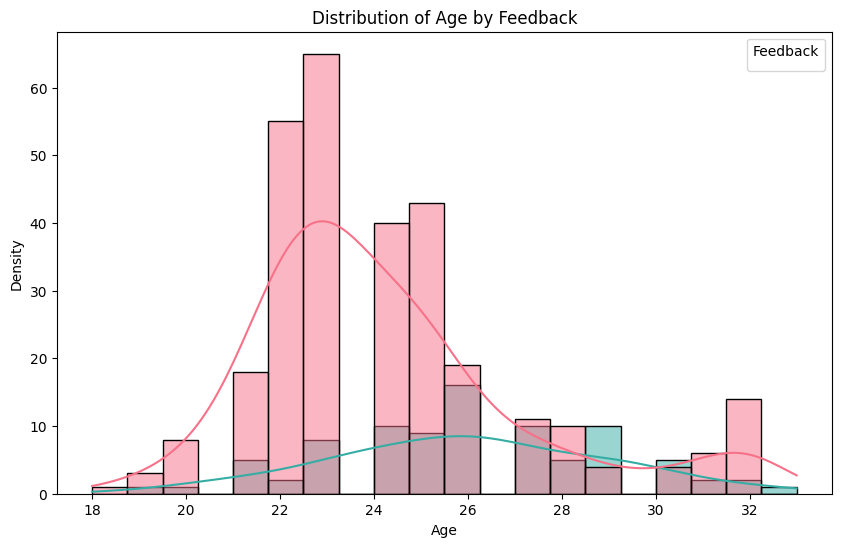

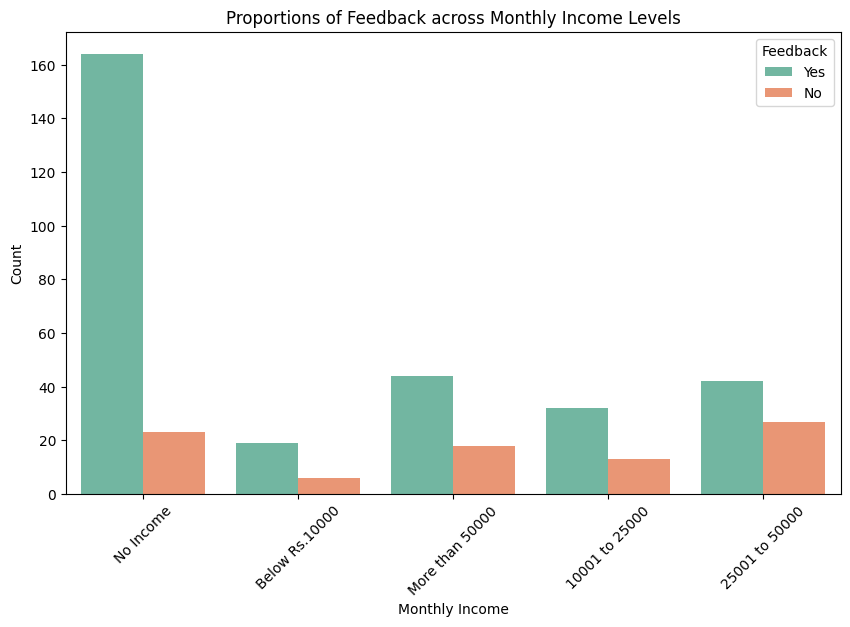

<ipython-input-7-de63a1dce0ea>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


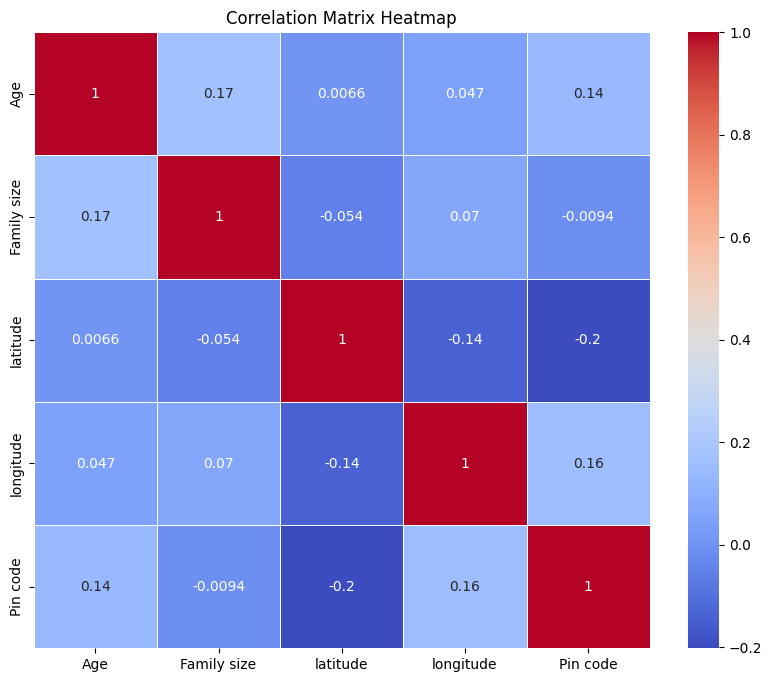

In [7]:
# Distribution of Age and Feedback with KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Output', kde=True, bins=20, palette='husl')
plt.title('Distribution of Age by Feedback')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Feedback')
plt.show()

# Proportions of Feedback across Monthly Income Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Output', palette='Set2')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix Heatmap
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [9]:
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Evaluation Report:")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Evaluation Report:
Accuracy: 0.8718

Confusion Matrix:
[[ 6  5]
 [ 5 62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.93      0.93      0.93        67

    accuracy                           0.87        78
   macro avg       0.74      0.74      0.74        78
weighted avg       0.87      0.87      0.87        78



<ipython-input-10-f6c601fc22ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette='coolwarm')


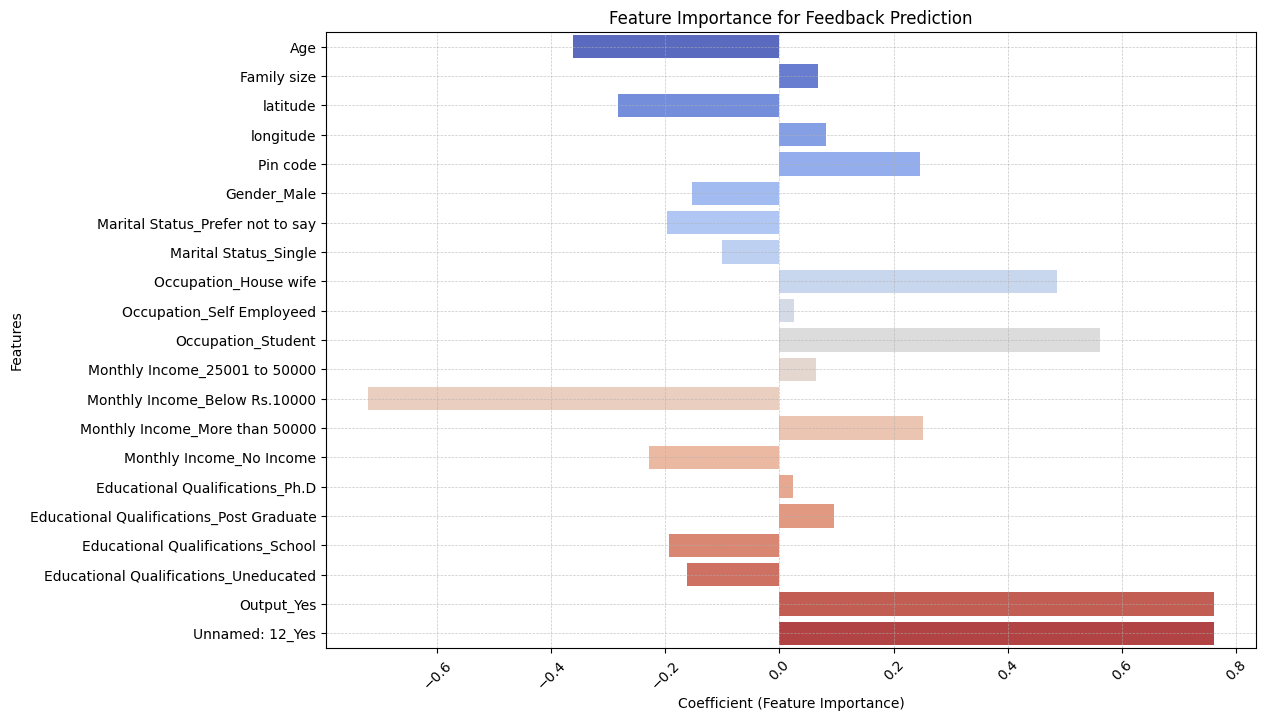

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      1.00      0.92        67

    accuracy                           0.86        78
   macro avg       0.43      0.50      0.46        78
weighted avg       0.74      0.86      0.79        78



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [10]:
feature_importance = model.coef_[0]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=X.columns, palette='coolwarm')
plt.xlabel("Coefficient (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance for Feedback Prediction")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

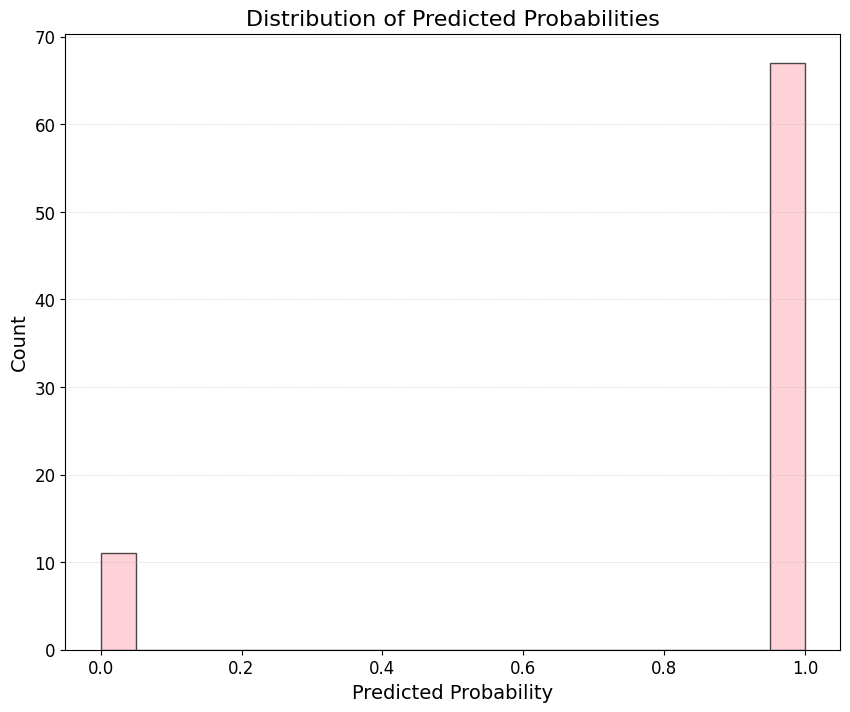

In [12]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
plt.hist(y_pred, bins=20, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Predicted Probabilities', fontsize=16)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()